# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
# YOUR CODE HERE
dataset = pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_red/wine_quality_red.tsv.gz", sep="\t")
dataset.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
1466,7.3,0.480,0.32,2.1,0.062,31.0,54.0,0.99728,3.30,0.65,10.0,7
573,10.5,0.590,0.49,2.1,0.070,14.0,47.0,0.99910,3.30,0.56,9.6,4
880,9.2,0.560,0.18,1.6,0.078,10.0,21.0,0.99576,3.15,0.49,9.9,5
1237,7.1,0.750,0.01,2.2,0.059,11.0,18.0,0.99242,3.39,0.40,12.8,6
13,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.99740,3.26,1.56,9.1,5
429,12.8,0.840,0.63,2.4,0.088,13.0,35.0,0.99970,3.10,0.60,10.4,6
35,7.8,0.645,0.00,5.5,0.086,5.0,18.0,0.99860,3.40,0.55,9.6,6
1272,5.9,0.460,0.00,1.9,0.077,25.0,44.0,0.99385,3.50,0.53,11.2,5
1315,7.5,0.630,0.27,2.0,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6
649,6.7,0.420,0.27,8.6,0.068,24.0,148.0,0.99480,3.16,0.57,11.3,6


I loaded the red subset from the Wine Quality dataset using panda's `read_csv` method. I have provided a random 10 sample rows from this dataset using the `sample` method.

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [4]:
# YOUR CODE HERE
dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'target'],
      dtype='object')

This dataset contains 11 physiochemical inputs and 1 sensory output. The `target` column is considered the sensory output column, which rates the wine quality using a target score between 0-10. The follwing 11 physiochemical inputs are:
- The `fixed acidity` column which provides the amount of non-volatile acids in the wine. If there is a high amount of non-volatile acids, it will taste strong but a low amount will taste flat.
- The `volatile acidity` column provides the amount of volatile acids in the wine. Typically, higher levels of volatile acids causes an odor that results in lower wine quality scores.
- The `citric acid` column provides the amount of citric acid in the wine. The prescence of citric acid gives a citrus flavor and odor to the wine which may help improve the overall target wine quality score. However, large amounts of citric acid can contribute negatively to the wine quality score.
- The `residual sugar` column provides the amount of leftover sugar in the wine. Typically, higher levels of residal sugar lead to sweeter wines while lower levels balance the acidity.
- The `chlorides` column provides the amount of chlorides in the wine. Higher levels of chlorides give a saltier taste to the wine which leads to lower wine quality target scores.
- The `free sulfur dioxide` column provides the amount of active sulfur dioxide that protects the wine from oxidation. If there are lower levels of free sulfur dioxide, the wine will reduce in wine quality.
- The `total sulfur dioxide` column provides the total amount of sulfur dioxide present in the wine. If there is too low or high amount, the quality of the wine will reduce and negatively impact the target score.
- The `density` column provides the mass of the unit per wine. If the density is high, there will be larger amounts of residual sugar which causes the wine to taste sweeter. If the density is lower, the wine will taste stronger in alcohol content.
- The `pH` column provides the acidity level of the wine. If the pH level is lower, it will taste more acidic and sour leading to poor wine quality scores.
- The `sulphates` column provides the amount of sulphates present in the wine. If there are higher levels of sulphates, the wine has a better aroma and a high quality fermentation process.
- The `alcohol` column provides the percentage of alcohol content in the wine. If there is higher alcohol content, it will lead to a better wine quality score.

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  target                1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


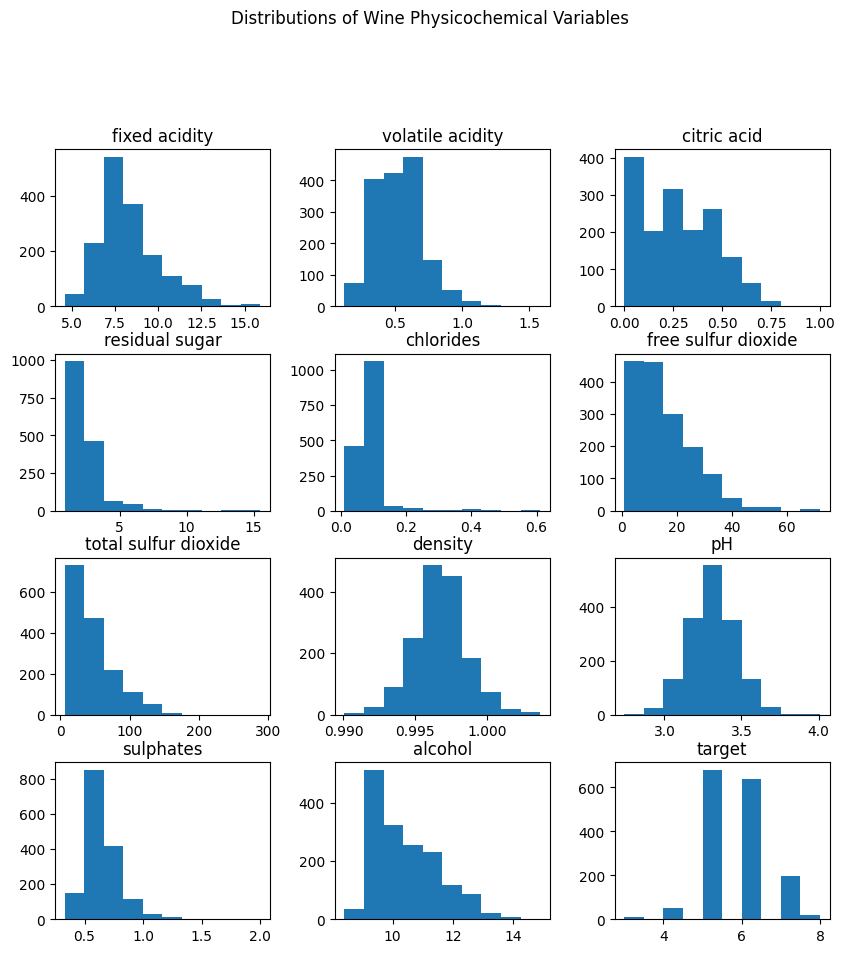

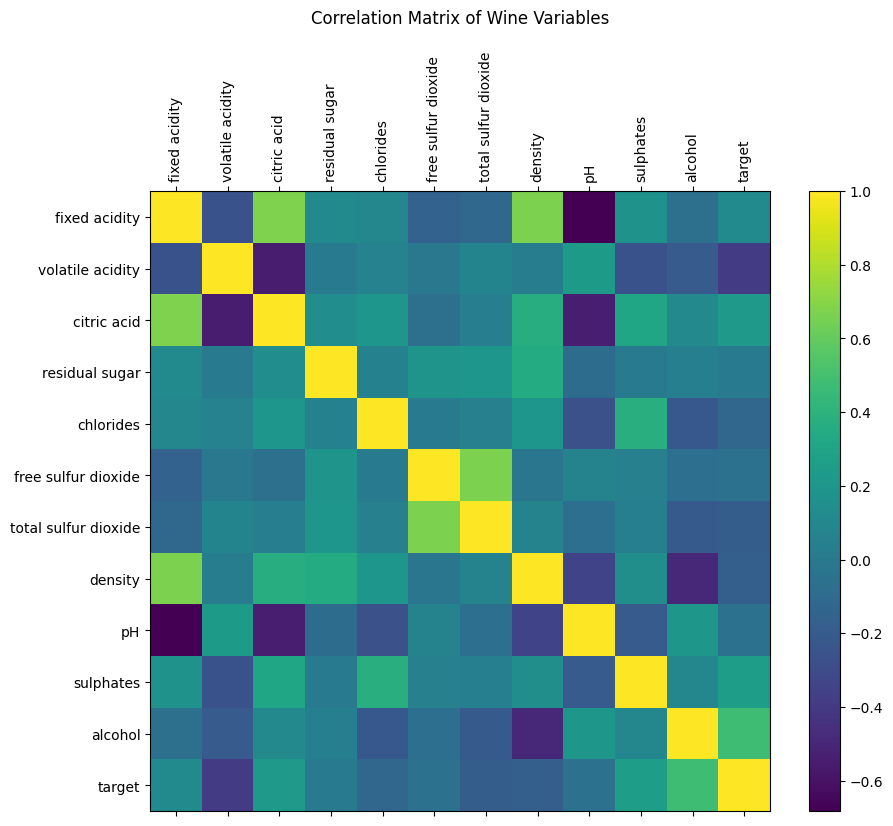

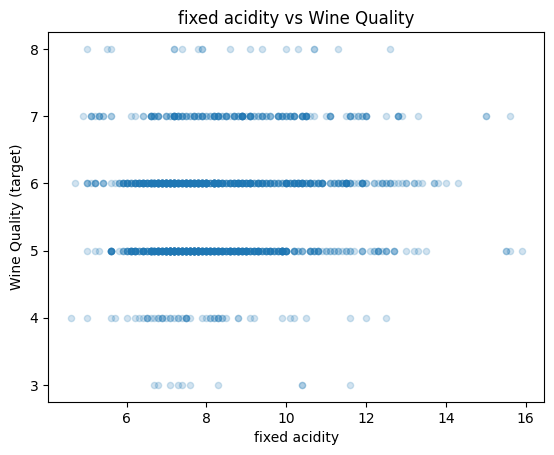

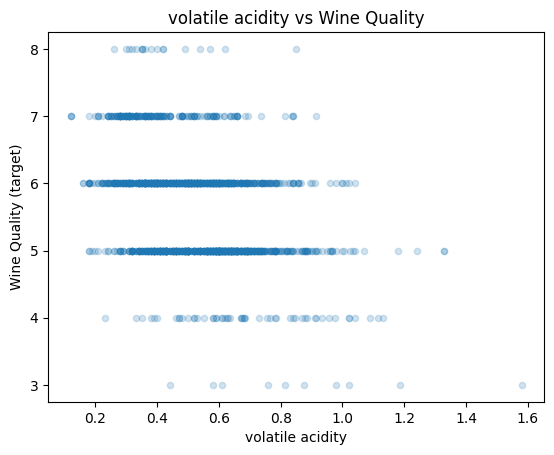

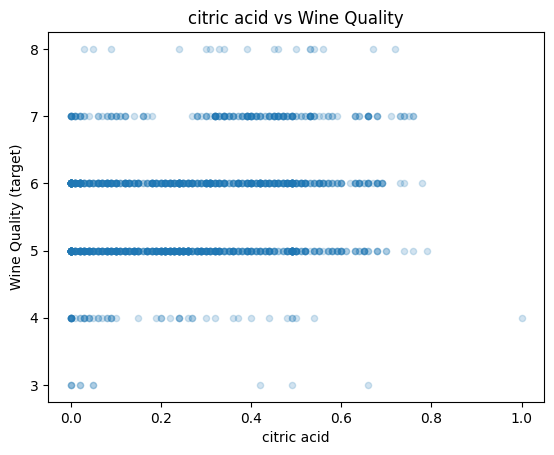

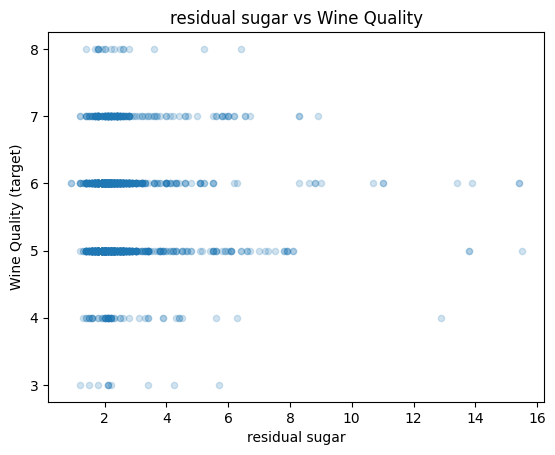

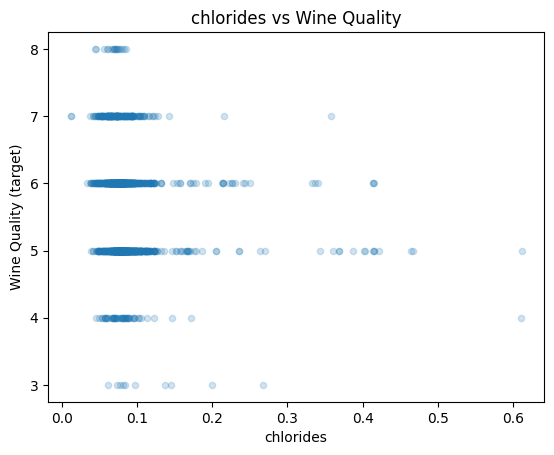

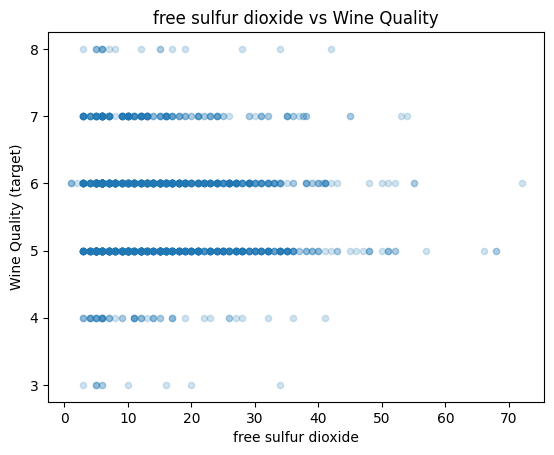

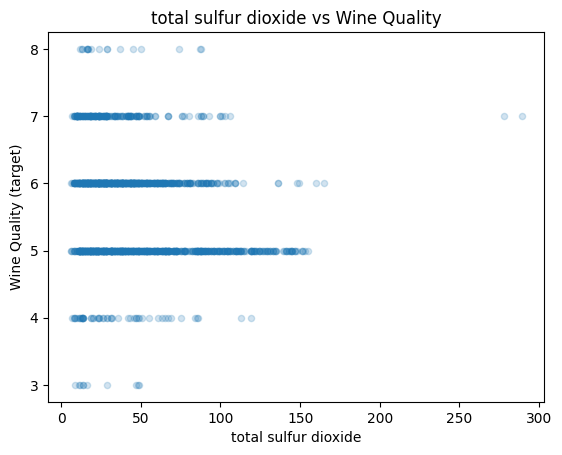

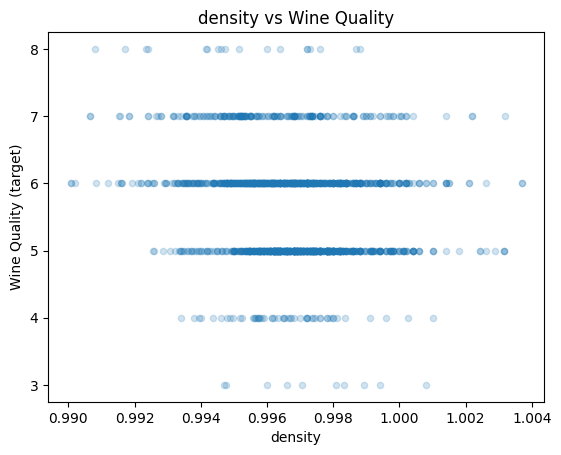

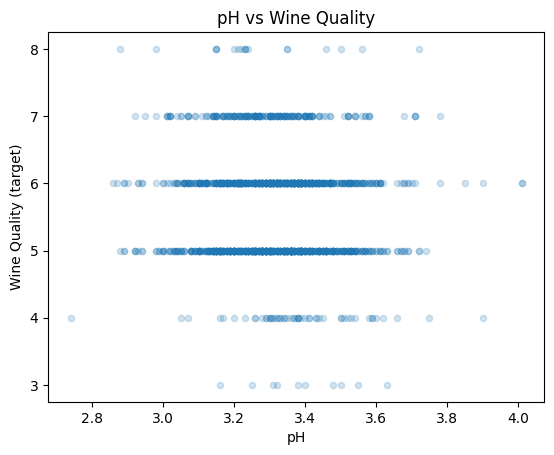

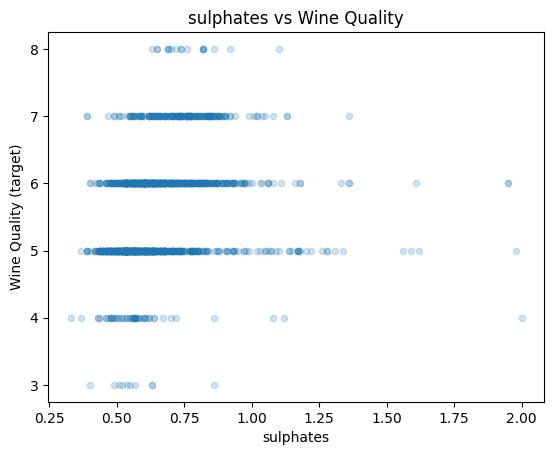

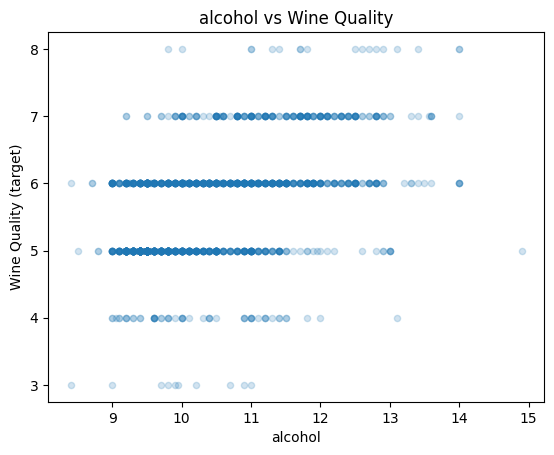


The 3 individual charts: 


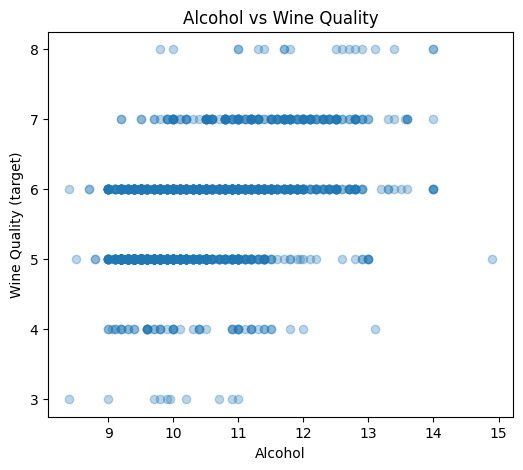

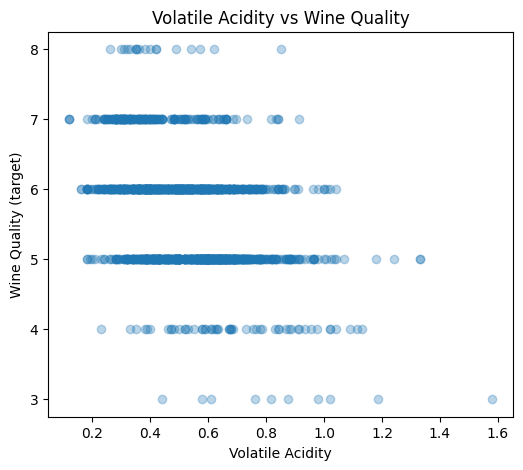

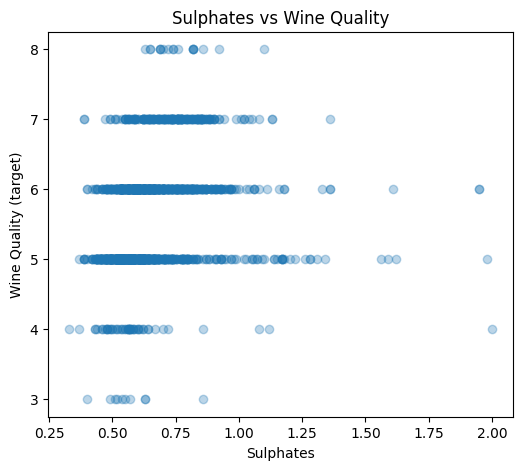

In [5]:
# YOUR CODE HERE
dataset.info()
dataset.describe()


dataset.hist(figsize=(10, 10), grid=False)
plt.suptitle("Distributions of Wine Physicochemical Variables", y=1.02)
plt.show()


correlations = dataset.corr()
plt.figure(figsize=(10, 8))
plt.matshow(correlations, fignum=1)
plt.colorbar()
plt.xticks(range(len(correlations.columns)), correlations.columns, rotation=90)
plt.yticks(range(len(correlations.columns)), correlations.columns)
plt.title("Correlation Matrix of Wine Variables", pad=20)
plt.show()


for col in dataset.columns:
    if col == "target":
        continue
    dataset.plot.scatter(col, "target", alpha=0.2)
    plt.title(f"{col} vs Wine Quality")
    plt.xlabel(col)
    plt.ylabel("Wine Quality (target)")
    plt.show()

print("\nThe 3 individual charts: ")

plt.figure(figsize=(6, 5))
plt.scatter(dataset["alcohol"], dataset["target"], alpha=0.3)
plt.xlabel("Alcohol")
plt.ylabel("Wine Quality (target)")
plt.title("Alcohol vs Wine Quality")
plt.show()
plt.figure(figsize=(6, 5))
plt.scatter(dataset["volatile acidity"], dataset["target"], alpha=0.3)
plt.xlabel("Volatile Acidity")
plt.ylabel("Wine Quality (target)")
plt.title("Volatile Acidity vs Wine Quality")
plt.show()
plt.figure(figsize=(6, 5))
plt.scatter(dataset["sulphates"], dataset["target"], alpha=0.3)
plt.xlabel("Sulphates")
plt.ylabel("Wine Quality (target)")
plt.title("Sulphates vs Wine Quality")
plt.show()


An exploratory analysis was performed on the dataset to understand the structure, scale, and cleanliness before visualizing the relationship between variables. It contains 1,599 entries and 12 numeric columns, with 11 physiochemical inputs and 1 sensory output that scores the quality of the wine on a scale between 0 and 10. The 11 physiochemical inputs have a type of float64 while the output column has a type of int64. There is no missing data within this dataset, indicating that no imputation is necessary. Also, the range of the input columns vary substantially. For instance, the range of total sulfur dioxide is between 6 to 289, whereas the range of chlorides is between 0.012 to 0.611.

The first chart that I found to be noteworthy is Alcohol vs Wine Quality. This scatterplot shows a strong positive relationship between the two variables, where wines with higher alcohol content tend to get higher wine quality target scores. However, wines with lower alcohol content tend to be more associated with lower target scores. This upward trend is more pronounced than for most of the other input variables which indicates alcohol as one of the strongest predictors observed during exploratory analysis.

The second chart that I found to be noteworthy is Volatile Acidity vs Wine Quality. This scatterplot shows a strong negative relationship between volatile acidity and the wine quality target scores. Wines with lower levels of volatile acidity tend to receive higher wine quality target scores, while wines with higher levels of volatile acidity are usually in a lower target score range. This downward trend showcases volatile acidity to be an informative variable for better understanding of wine quality scores.

The third chart that I found to be noteworthy is Sulphates vs Wine Quality. This scatterplot shows a positive relationship between the two variables, indicating that wines with higher sulphate levels tend to be associated with higher wine quality target scores. Although this association is not as strong as alcohol, this upward trend suggests that sulphates can contribute to higher wine quality and worth considering for predictive modeling.

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

<Figure size 1000x800 with 0 Axes>

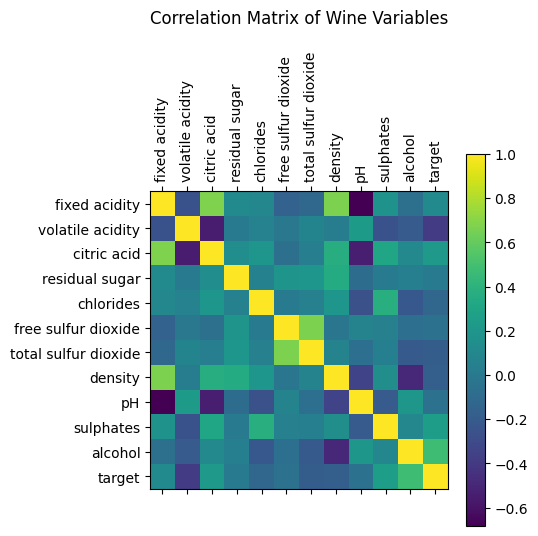

In [6]:
# YOUR CODE HERE
correlation_matrix = dataset.corr()

plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Correlation Matrix of Wine Variables", pad=20)
plt.show()

The correlation matrix highlights total sulfur dioxide and free sulfur dioxide as the most correlated pair of different columns. This seems to be expected since free sulfur dioxide is a component of total sulfur dioxide itself. Additionally, alcohol shows the strongest positive correlation with the wine quality target score, indicating that higher levels of alcohol tend to be associated with higher target scores.

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [ ]:
# YOUR CODE HERE

The three different regresison model classes to try in problem 6 from the scikit-learn documentation are Linear Regression, Decision Tree Regressor, and the Gradient Boosting Regressor.

Linear Regression:
- scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- Explanation: https://www.datacamp.com/tutorial/sklearn-linear-regression

Decision Tree Regressor:
- scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
- Explanation: https://www.geeksforgeeks.org/machine-learning/python-decision-tree-regression-using-sklearn/

Gradient Boosting Regressor:
- scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
- Explanation:https://towardsdatascience.com/gradient-boosting-regressor-explained-a-visual-guide-with-code-examples-c098d1ae425c/


### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

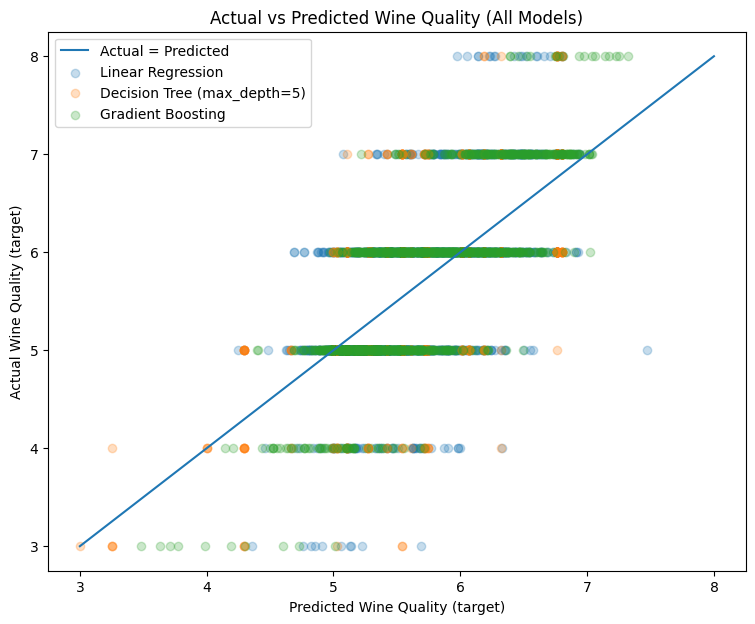

                      Model  L2 Loss (MSE)  L1 Loss (MAE)
          Gradient Boosting       0.254381       0.396659
Decision Tree (max_depth=5)       0.350153       0.457574
          Linear Regression       0.416767       0.500490


In [8]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


target_col = "target"
X = dataset.drop(columns=[target_col])
y = dataset[target_col]


models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree (max_depth=5)": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
}

preds = {}
loss_rows = []

for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    preds[name] = y_pred
    l2_loss = mean_squared_error(y, y_pred)     
    l1_loss = mean_absolute_error(y, y_pred)

    loss_rows.append({
        "Model": name,
        "L2 Loss (MSE)": l2_loss,
        "L1 Loss (MAE)": l1_loss
    })

plt.figure(figsize=(9, 7))


all_preds = pd.Series(pd.concat([pd.Series(v) for v in preds.values()], ignore_index=True))
min_val = min(y.min(), all_preds.min())
max_val = max(y.max(), all_preds.max())
plt.plot([min_val, max_val], [min_val, max_val], label="Actual = Predicted")

for name, y_pred in preds.items():
    plt.scatter(y_pred, y, alpha=0.25, label=name)

plt.title("Actual vs Predicted Wine Quality (All Models)")
plt.xlabel("Predicted Wine Quality (target)")
plt.ylabel("Actual Wine Quality (target)")
plt.legend()
plt.show()

loss_df = pd.DataFrame(loss_rows).sort_values("L2 Loss (MSE)")
print(loss_df.to_string(index=False))

Three regression models were trained on the wine dataset, by using the input columns to predict the wine quality target score. The three models used are Linear Regression, a Decision Tree Regressor with a maximum depth of 5, and a Gradient Boosting Regressor. All models were fit using the dataset and generated predictions on the same data to compare model behavior. The Gradient Boosting Regressor shows the tightest clustering in the wine quality range between 5 and 7 which demonstrates stronger predictive performance. However, Linear Regression shows the widest dispersion, showcasing its limitation in modeling nonlinear relationships between the inputs and target. Since the Decision Tree Regressor captures the nonlinear patterns in the data, it performs better than Linear Regression even if those points are spread away from the reference line. This analysis is backed by the L2 loss and L1 loss which show that Gradient Boosting has the lowest error values, indicating the best overall fit.


### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

                      Model  Train L2 Loss (MSE)  CV L2 Loss (MSE) Mean  CV - Train (Gap)
          Gradient Boosting             0.254381               0.385547          0.131166
          Linear Regression             0.416767               0.428763          0.011996
Decision Tree (max_depth=5)             0.350153               0.466533          0.116380


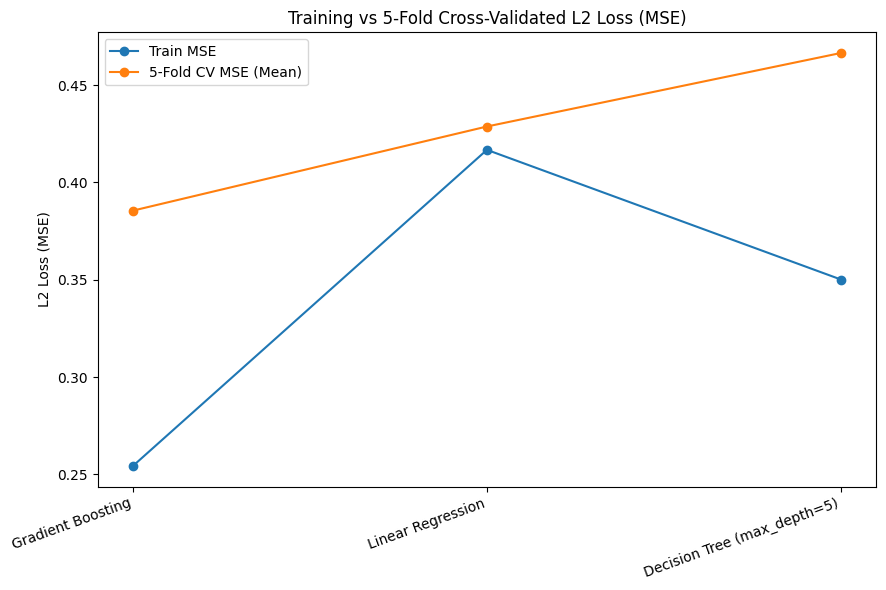

In [12]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

target_col = "target"
X = dataset.drop(columns=[target_col])
y = dataset[target_col]

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree (max_depth=5)": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
}


cv = KFold(n_splits=5, shuffle=True, random_state=42)

rows = []

for name, model in models.items():
    model.fit(X, y)
    y_pred_train = model.predict(X)
    train_mse = mean_squared_error(y, y_pred_train)

    cv_neg_mse_scores = cross_val_score(
        model,
        X,
        y,
        scoring="neg_mean_squared_error",
        cv=cv
    )
    cv_mse_scores = -cv_neg_mse_scores
    cv_mse_mean = cv_mse_scores.mean()

    rows.append({
        "Model": name,
        "Train L2 Loss (MSE)": train_mse,
        "CV L2 Loss (MSE) Mean": cv_mse_mean,
        "CV - Train (Gap)": cv_mse_mean - train_mse
    })

results_df = pd.DataFrame(rows).sort_values("CV L2 Loss (MSE) Mean")
print(results_df.to_string(index=False))


plt.figure(figsize=(9, 6))
x_labels = results_df["Model"]
plt.plot(x_labels, results_df["Train L2 Loss (MSE)"], marker="o", label="Train MSE")
plt.plot(x_labels, results_df["CV L2 Loss (MSE) Mean"], marker="o", label="5-Fold CV MSE (Mean)")
plt.xticks(rotation=20, ha="right")
plt.ylabel("L2 Loss (MSE)")
plt.title("Training vs 5-Fold Cross-Validated L2 Loss (MSE)")
plt.legend()
plt.tight_layout()
plt.show()

The three regression models were evaluated using 5-fold cross-validation and compared against their training L2 loss, which is also the mean squared error. The Gradient Boosting Model has the lowest training error but a large increase in cross-validated error, indicating overfitting despite strong generalization. This model provides flexibility to allow it to fit the training data closely, but this does not fully generalize to unseen data. The Decision Tree model has a similar difference between the training and cross-validated loss and has a poor generalization performance despite limiting the tree depth. However, Linear Regression shows very similar training and cross-validated L2 losses, suggesting low variance and stable generalization.

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [ ]:
# YOUR CODE HERE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

target_col = "target"
X = dataset.drop(columns=[target_col])
y = dataset[target_col]


pipelines = {
    "Linear Regression (scaled)": make_pipeline(
        StandardScaler(),
        LinearRegression()
    ),
    "Decision Tree (max_depth=5, scaled)": make_pipeline(
        StandardScaler(),
        DecisionTreeRegressor(max_depth=5, random_state=42)
    ),
    "Gradient Boosting (scaled)": make_pipeline(
        StandardScaler(),
        GradientBoostingRegressor(random_state=42)
    ),
}


rows = []
for name, pipe in pipelines.items():
    pipe.fit(X, y)
    y_pred = pipe.predict(X)
    train_mse = mean_squared_error(y, y_pred)
    rows.append({"Model": name, "Train L2 Loss (MSE)": train_mse})

results_scaled = pd.DataFrame(rows).sort_values("Train L2 Loss (MSE)")
print(results_scaled.to_string(index=False))

                              Model  Train L2 Loss (MSE)
         Gradient Boosting (scaled)             0.254381
Decision Tree (max_depth=5, scaled)             0.350153
         Linear Regression (scaled)             0.416767


The three regression models were rebuilt using scikit-learn pipelines with StandardScaler() so that each feature has a mean of 0 and standard deviation of 1. After fitting, the training L2 loss was determined for each scaled pipeline. The results are similar to problem 6's results where the Gradient Boosting has the lowest means squared error, followed by the Decision Tree, with Linear Regression highest. This demonstrates how scaling did not change performance for these models on this dataset. This is expected for decision tree models because split decisions depend on their feature ordering. For linear regression, the scaling affects coefficient magnitudes but not fitted predictions, so the mean squared errors will remain the same.

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [ ]:
# YOUR CODE HERE

Cross validation helps to compare the models initial settings, but randomly building decision trees with depth limits can lean towards overfitting the validation noise rather than improving generalization.

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [ ]:
# YOUR CODE HERE

The Gradient Boosting Regressor was the best model from all the models that I built in this project. I picked this model because of its predictive performance that is measured by its mean squared loss and the generalization behavior evaluated through the 5 cross-validation. In all of the models that I built, the Gradient Boosting Regressor consistently has the lowest mean squared loss which highlights the ability for this model to capture non-linear relationships in the wine dataset. Although the cross-validated L2 loss increased relative to the training error, these outcomes are expected for low-bias models and still outperformed the other models in absolute predictive accuracy. In comparison, Linear Regression has higher L2 losses which reflects the model's high bias since it is limited to linear relationships only. In the middle of both of these models, the Decision Tree Regressor improves upon linear regression by modeling nonlinearities, but has a tradeoff of higher variance and weaker generalization than gradient boosting. 